# Exercise 2 : Large LP-problems
Testing the preformance of simplex vs HiGHS method on large LP-problems.

## Imports

In [19]:
import numpy as np
from numpy.random import rand, randn
from scipy.optimize import linprog
from time import perf_counter
import warnings
import matplotlib.pyplot as plt

# Suppress deprecation warnings for simplex
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Constants

In [20]:
NUM_TRIALS = 5
SIMPLEX_START_SIZE = 10
SIMPLEX_MAX_SIZE = 200
SIMPLEX_STEP_SIZE = 10
HIGHS_START_SIZE = 100
HIGHS_MAX_SIZE = 3000
HIGHS_STEP_SIZE = 100

## i) Why use matrix and vector notation?

In [21]:
print(
    """
Matrix and vector notation provides several advantages:
1. Compact representation: Instead of writing out hundreds or thousands
   of individual inequality equations, we can represent them as Ax ≤ b.
2. Computational efficiency: Matrix operations are highly optimized in
   libraries like NumPy, making computation much faster.
3. Scalability: The same algorithm can handle problems of any size
   without modification.
4. Mathematical clarity: Makes the structure of the problem clear and
   facilitates theoretical analysis.
5. Implementation simplicity: Reduces code complexity and potential
   for errors when dealing with large systems.
"""
)


Matrix and vector notation provides several advantages:
1. Compact representation: Instead of writing out hundreds or thousands
   of individual inequality equations, we can represent them as Ax ≤ b.
2. Computational efficiency: Matrix operations are highly optimized in
   libraries like NumPy, making computation much faster.
3. Scalability: The same algorithm can handle problems of any size
   without modification.
4. Mathematical clarity: Makes the structure of the problem clear and
   facilitates theoretical analysis.
5. Implementation simplicity: Reduces code complexity and potential
   for errors when dealing with large systems.



## ii) Example timing with simplex method.

In [22]:
n, m = 10, 10
A = np.concatenate([rand(m, n) + 1, np.eye(m)], axis=-1)
b = np.ones(m)
c = np.concatenate([randn(n), np.zeros(m)])

# Time the optimization
start_time = perf_counter()
result = linprog(-c, A_eq=A, b_eq=b, method="simplex", options={"maxiter": 5000})
elapsed_time = 1000 * (perf_counter() - start_time)

print(f"Problem size: m = n = {n}")
print(f"Elapsed time: {elapsed_time:.2f} ms")
print(f"Optimization successful: {result.success}")

Problem size: m = n = 10
Elapsed time: 3.49 ms
Optimization successful: True


## iii) Find problem size where simplex average time exceeds 1 second.

In [23]:
simplex_times = []
simplex_sizes = []

# Test different problem sizes
for size in range(SIMPLEX_START_SIZE, SIMPLEX_MAX_SIZE, SIMPLEX_STEP_SIZE):
    times = []
    for trial in range(NUM_TRIALS):
        n, m = size, size
        A = np.concatenate([rand(m, n) + 1, np.eye(m)], axis=-1)
        b = np.ones(m)
        c = np.concatenate([randn(n), np.zeros(m)])

        start_time = perf_counter()
        result = linprog(
            -c, A_eq=A, b_eq=b, method="simplex", options={"maxiter": 5000}
        )
        elapsed = 1000 * (perf_counter() - start_time)
        times.append(elapsed)

    avg_time = np.mean(times)
    simplex_times.append(avg_time)
    simplex_sizes.append(size)

    print(f"  m = n = {size:3d}: Average time = {avg_time:7.2f} ms")

    if avg_time > 1000:
        print(f"\n*** Simplex exceeds 1 second at m = n = {size} ***")
        simplex_threshold = size
        break
else:
    simplex_threshold = simplex_sizes[-1]

  m = n =  10: Average time =    2.93 ms
  m = n =  20: Average time =    6.24 ms
  m = n =  30: Average time =   10.99 ms
  m = n =  40: Average time =   18.88 ms
  m = n =  50: Average time =   31.87 ms
  m = n =  60: Average time =   45.64 ms
  m = n =  70: Average time =   68.28 ms
  m = n =  80: Average time =   95.76 ms
  m = n =  90: Average time =  121.83 ms
  m = n = 100: Average time =  175.63 ms
  m = n = 110: Average time =  212.49 ms
  m = n = 120: Average time =  297.02 ms
  m = n = 130: Average time =  378.33 ms
  m = n = 140: Average time =  480.38 ms
  m = n = 150: Average time =  587.77 ms
  m = n = 160: Average time =  741.40 ms
  m = n = 170: Average time =  935.95 ms
  m = n = 180: Average time = 1086.36 ms

*** Simplex exceeds 1 second at m = n = 180 ***


## iv) Test with HiGHS method.

In [24]:
highs_times = []
highs_sizes = []

# Test different problem sizes with HiGHS
for size in range(HIGHS_START_SIZE, HIGHS_MAX_SIZE, HIGHS_STEP_SIZE):
    times = []
    for trial in range(NUM_TRIALS):
        n, m = size, size
        A = np.concatenate([rand(m, n) + 1, np.eye(m)], axis=-1)
        b = np.ones(m)
        c = np.concatenate([randn(n), np.zeros(m)])

        start_time = perf_counter()
        result = linprog(-c, A_eq=A, b_eq=b, method="highs")
        elapsed = 1000 * (perf_counter() - start_time)
        times.append(elapsed)

    avg_time = np.mean(times)
    highs_times.append(avg_time)
    highs_sizes.append(size)

    print(f"  m = n = {size:4d}: Average time = {avg_time:7.2f} ms")

    if avg_time > 1000:
        print(f"\n*** HiGHS exceeds 1 second at m = n = {size} ***")
        highs_threshold = size
        break
else:
    highs_threshold = highs_sizes[-1]

  m = n =  100: Average time =    4.58 ms
  m = n =  200: Average time =   13.72 ms
  m = n =  300: Average time =   29.37 ms
  m = n =  400: Average time =   50.69 ms
  m = n =  500: Average time =   90.54 ms
  m = n =  600: Average time =  127.95 ms
  m = n =  700: Average time =  179.01 ms
  m = n =  800: Average time =  235.41 ms
  m = n =  900: Average time =  300.65 ms
  m = n = 1000: Average time =  369.46 ms
  m = n = 1100: Average time =  451.71 ms
  m = n = 1200: Average time =  526.74 ms
  m = n = 1300: Average time =  627.75 ms
  m = n = 1400: Average time =  723.16 ms
  m = n = 1500: Average time =  829.71 ms
  m = n = 1600: Average time =  959.32 ms
  m = n = 1700: Average time = 1075.22 ms

*** HiGHS exceeds 1 second at m = n = 1700 ***


## Comparison of Simplex and HiGHS methods.

Saved: img/ex2_performance_comparison.png

Simplex method exceeds 1 second at: m = n = 180
HiGHS method exceeds 1 second at:  m = n = 1700
Performance improvement: ~9.4x faster


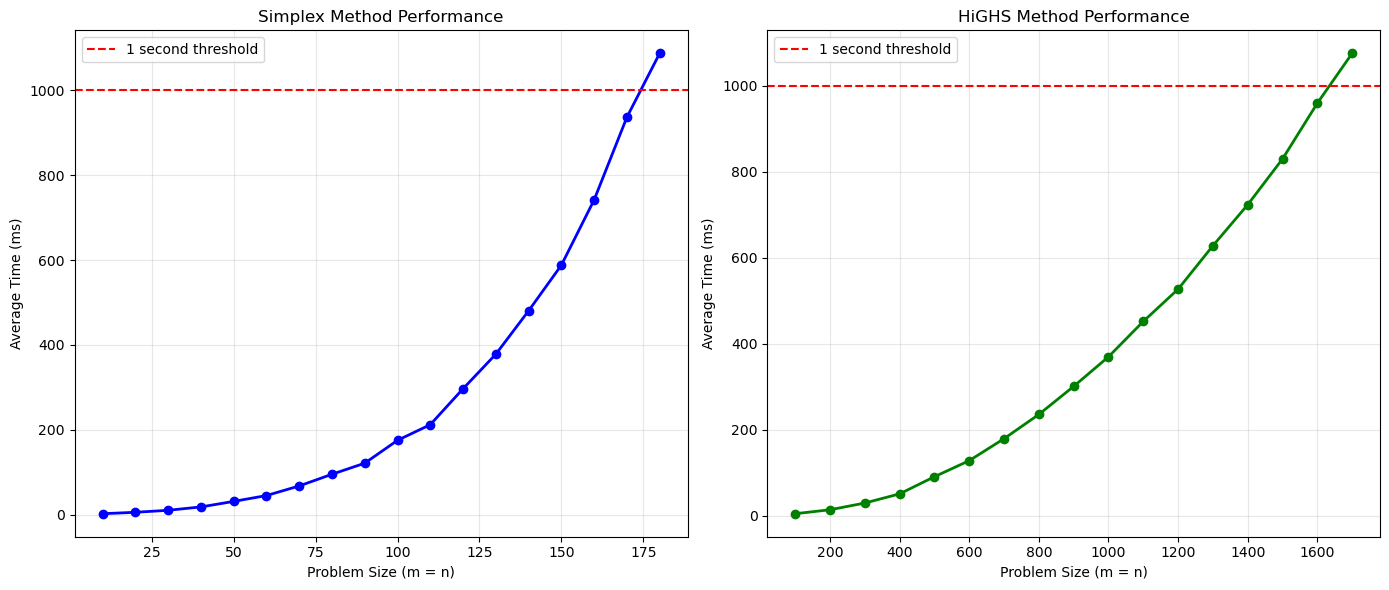

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Simplex method
ax1.plot(simplex_sizes, simplex_times, "o-", color="blue", linewidth=2, markersize=6)
ax1.axhline(y=1000, color="r", linestyle="--", label="1 second threshold")
ax1.set_xlabel("Problem Size (m = n)")
ax1.set_ylabel("Average Time (ms)")
ax1.set_title("Simplex Method Performance")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: HiGHS method
ax2.plot(highs_sizes, highs_times, "o-", color="green", linewidth=2, markersize=6)
ax2.axhline(y=1000, color="r", linestyle="--", label="1 second threshold")
ax2.set_xlabel("Problem Size (m = n)")
ax2.set_ylabel("Average Time (ms)")
ax2.set_title("HiGHS Method Performance")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig("img/ex2_performance_comparison.png", dpi=300, bbox_inches="tight")
print("Saved: img/ex2_performance_comparison.png")

print(f"\nSimplex method exceeds 1 second at: m = n = {simplex_threshold}")
print(f"HiGHS method exceeds 1 second at:  m = n = {highs_threshold}")
print(f"Performance improvement: ~{highs_threshold / simplex_threshold:.1f}x faster")